<a href="https://colab.research.google.com/github/vahidseydi/CGN/blob/main/FewShot_NoActiveL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downloading dataset file from Github

In [ ]:
#ابتدا دیتاست موجود در فولدر دیتا در آدرس گیت هاب پروژه، را در این نوت بوک دخیره می کنیم
! wget 'https://github.com/vahidseydi/CGN/blob/main/Data/amazon_electronics_computers%20(1).npz?raw=true'

--2021-05-24 11:15:30--  https://github.com/vahidseydi/CGN/blob/main/Data/amazon_electronics_computers%20(1).npz?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/vahidseydi/CGN/raw/main/Data/amazon_electronics_computers%20(1).npz [following]
--2021-05-24 11:15:31--  https://github.com/vahidseydi/CGN/raw/main/Data/amazon_electronics_computers%20(1).npz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vahidseydi/CGN/main/Data/amazon_electronics_computers%20(1).npz [following]
--2021-05-24 11:15:31--  https://raw.githubusercontent.com/vahidseydi/CGN/main/Data/amazon_electronics_computers%20(1).npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.git

# Load Data

In [ ]:
import numpy as np
#فایل های موجود در دیتاست را می خوانیم
npz_data=np.load('/content/amazon_electronics_computers (1).npz?raw=true')
npz_data.files

['adj_data',
 'adj_indices',
 'adj_indptr',
 'adj_shape',
 'attr_data',
 'attr_indices',
 'attr_indptr',
 'attr_shape',
 'labels',
 'class_names']

In [ ]:
#کلاس های موجود در دیتاست شامل 10 کلاس می باشد
class_names =npz_data['class_names']
class_names

array(['Desktops', 'Data Storage', 'Laptops', 'Monitors',
       'Computer Components', 'Video Projectors', 'Routers', 'Tablets',
       'Networking Products', 'Webcams'], dtype='<U19')

In [ ]:
#تابع زیر برای جداسازی داده های آموزش، تست و اعتبارسنجی استفاده می شود
#برابر با تمام داده ها می باشد y
labels =npz_data['labels']
y=labels.size
#p for calculating percentage for idx_train,val,test
p = lambda x: x*y/100

In [ ]:
import numpy as np
import scipy.sparse as sp
import torch
from scipy.sparse import  csr_matrix


def load_data():
 
 features = sp.csr_matrix((npz_data['attr_data'], npz_data['attr_indices'], npz_data['attr_indptr']),shape=npz_data['attr_shape'])

 # build graph
 
 adj= sp.csr_matrix(sp.csr_matrix((npz_data['adj_data'], npz_data['adj_indices'], npz_data['adj_indptr']),shape=npz_data['adj_shape']))
 
 # build symmetric adjacency matrix

 adj = adj + adj.T.multiply(adj.T > adj) - adj.multiply(adj.T > adj)
 adj = normalize(adj + sp.eye(adj.shape[0]))
 #اول اعداد 0 و 1 هست بعد از نرمالایز تغییر میکند 

 labels=npz_data['labels']
 #لیبل ها را یکی اضافه می کنیم تا لیبل 0 را به داده های بدون لیبل دهیم
 labels=labels+1

 #جداسازی داده ها 
 idx_train =range(round(p(70)))
 idx_val = range(idx_train[-1],idx_train[-1]+round(p(15)))
 idx_test =range(idx_val[-1],idx_val[-1]+round(p(15)))

 idx_train = torch.LongTensor(idx_train)
 idx_val = torch.LongTensor(idx_val)
 idx_test = torch.LongTensor(idx_test)

 features = torch.FloatTensor(np.array(features.todense()))
 adj = torch.FloatTensor(np.array(adj.todense()))
 labels = torch.LongTensor(labels)


 return adj, features, labels, idx_train, idx_val, idx_test

In [ ]:
def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    #sum in every row 
    r_inv = np.power(rowsum, -1).flatten()
    # every sum to the power of -1 
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    #diagonal matrice 
    mx = r_mat_inv.dot(mx)
    return mx

In [ ]:
def accuracy(output, labels):
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)    

In [ ]:
adj, features, labels, idx_train, idx_val, idx_test = load_data()




#Constructing Train data

In [ ]:
#20% of train data for labeled
#80% of train data for unlabeled
#جداسازی داده های با لیبل و بدون لیبل برای آموزش 

p_train = lambda x: x*len(idx_train)/100

idx_labeled_train =range(round(p_train(20)))
idx_unlabeled_train = range(idx_labeled_train[-1],idx_labeled_train[-1]+round(p_train(80)))


In [ ]:
print(idx_labeled_train,idx_unlabeled_train)

range(0, 1925) range(1924, 9625)


In [ ]:
#اندیس مربوط به هر کلاسی را جدا می کنیم
class_1 =[]
class_2 =[]
class_3 =[]
class_4 =[]
class_5 =[]
class_6 =[]
class_7 =[]
class_8 =[]
class_9 =[]
class_10=[]
class_1=[i for i,x in enumerate(labels[idx_labeled_train]) if x==1] 
class_2=[i for i,x in enumerate(labels[idx_labeled_train]) if x==2] 
class_3=[i for i,x in enumerate(labels[idx_labeled_train]) if x==3]
class_4=[i for i,x in enumerate(labels[idx_labeled_train]) if x==4] 
class_5=[i for i,x in enumerate(labels[idx_labeled_train]) if x==5] 
class_6=[i for i,x in enumerate(labels[idx_labeled_train]) if x==6] 
class_7=[i for i,x in enumerate(labels[idx_labeled_train]) if x==7] 
class_8=[i for i,x in enumerate(labels[idx_labeled_train]) if x==8] 
class_9=[i for i,x in enumerate(labels[idx_labeled_train]) if x==9] 
class_10=[i for i,x in enumerate(labels[idx_labeled_train]) if x==10] 

In [ ]:
#class_10

In [ ]:
labels[583]

tensor(10)

In [ ]:
#می خواهیم از هر کلاسی به صورت رندوم سمپل انتخاب کنیم
import random
Random_idx_train=[]
#با تعداد شات تعیین می کنیم که از هر کلاس چند سمپل نیاز داریم
N_shot=10
for i in range(N_shot):
  Random_idx_train.append(random.choice(class_1))
  Random_idx_train.append(random.choice(class_2))
  Random_idx_train.append(random.choice(class_3))
  Random_idx_train.append(random.choice(class_4))
  Random_idx_train.append(random.choice(class_5))
  Random_idx_train.append(random.choice(class_6))
  Random_idx_train.append(random.choice(class_7))
  Random_idx_train.append(random.choice(class_8))
  Random_idx_train.append(random.choice(class_9))
  Random_idx_train.append(random.choice(class_10))

#Random_idx_train#اندیس 

In [ ]:
#اگر بخواهیم از هر کلاس یک سمپل انتخاب کنیم مجموعا 10 سمپل با لیبل داریم 
#اگر بخواهیم نسبت 20 به 80 را رعایت کنیم پس لازم است 40 داده بدون لیبل هم انتخاب کنیم

hiddenIndex_train=[]

for i in range(40*N_shot):
  hiddenIndex_train.append(random.choice(idx_unlabeled_train))
#hiddenIndex_train  

In [ ]:
#مجموع اندیس های آموزش شامل اندیس های زیر می باشد:
#traindata_idx=Random_idx_train+hiddenIndex_train


In [ ]:
#labels_train_hidden:
#تمام لیبل ها حتی هیدن ها،برای استفاده در اکتیولرنینگ
labels_train_hidden=torch.hstack((labels[Random_idx_train],labels[hiddenIndex_train]))
labels_train_hidden.shape

torch.Size([500])

In [ ]:
#labels_train_hidden

In [ ]:
labels[Random_idx_train]

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,
         9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,
         7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,
         5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1,  2,
         3,  4,  5,  6,  7,  8,  9, 10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
         1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
#labels[Random_idx_train]==labels_train_hidden[0:10*N_shot]
#labels[hiddenIndex_train]==labels_train_hidden[10*N_shot:10*N_shot*4+10*N_shot]

In [ ]:
#labels_train=labels_train_hidden
#با توجه به اینکه از هر کلاس چند تا سمپل انتخاب کردیم از شماره آخری بقیه مربوط به هیدن ها میشود که صفر میذاریم
#labels_train[10*N_shot+1:]=0

In [ ]:
#labels_train

In [ ]:
#labels_train_hidden

In [ ]:
labels_train=labels_train_hidden.detach().clone()
#با توجه به اینکه از هر کلاس چند تا سمپل انتخاب کردیم از شماره آخری بقیه مربوط به هیدن ها میشود که صفر میذاریم
labels_train[10*N_shot:]=0

In [ ]:
#labels_train_hidden

In [ ]:
#labels_train

In [ ]:
#ایجاد ماتریس ویژگی ها از داده های با لیبل و بدون لیبل
features_train=torch.vstack((features[Random_idx_train],features[hiddenIndex_train]))
features_train.shape

torch.Size([500, 767])

In [ ]:
features_train[0:10*N_shot]==features[Random_idx_train]
features_train[10*N_shot:10*N_shot*4+10*N_shot]==features[hiddenIndex_train]

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [ ]:
#adj[1:10*N_shot,1:10*N_shot].shape

In [ ]:
#ایجاد ماتریس مجاورت از داده های با لیبل و بدون لیبل
adj_train=torch.vstack((adj[Random_idx_train],adj[hiddenIndex_train]))

for i in hiddenIndex_train :
    Random_idx_train.append(i)
    
#ایجاد تقارن در ماتریس مجاورت
adj_train=adj_train[0:10*N_shot*4+10*N_shot,Random_idx_train]

In [ ]:
#adj_train.shape

In [ ]:
#Random_idx_train[2]

In [ ]:
#adj[717].shape

In [ ]:
#adj_train[0].shape

In [ ]:
#adj[782,782]
#adj[30,30]

#Constructing Test data

In [ ]:
##داده های تست و اعتبارسنجی نیز دقیقا مشابه داده های آموزش ایجاد می شوند##

#20% of test data for labeled
#80% of test data for unlabeled

p_test = lambda x: x*len(idx_test)/100

idx_labeled_test =range(round(p_test(20)))
idx_unlabeled_test = range(idx_labeled_test[-1],idx_labeled_test[-1]+round(p_test(80)))


In [ ]:
print(idx_labeled_test,idx_unlabeled_test)

range(0, 413) range(412, 2062)


In [ ]:
#اندیس مربوط به هر کلاسی را جدا می کنیم
class_1 =[]
class_2 =[]
class_3 =[]
class_4 =[]
class_5 =[]
class_6 =[]
class_7 =[]
class_8 =[]
class_9 =[]
class_10=[]

class_1 =[i for i,x in enumerate(labels[idx_labeled_test]) if x==1] 
class_2 =[i for i,x in enumerate(labels[idx_labeled_test]) if x==2] 
class_3 =[i for i,x in enumerate(labels[idx_labeled_test]) if x==3]
class_4 =[i for i,x in enumerate(labels[idx_labeled_test]) if x==4] 
class_5 =[i for i,x in enumerate(labels[idx_labeled_test]) if x==5] 
class_6 =[i for i,x in enumerate(labels[idx_labeled_test]) if x==6] 
class_7 =[i for i,x in enumerate(labels[idx_labeled_test]) if x==7] 
class_8 =[i for i,x in enumerate(labels[idx_labeled_test]) if x==8] 
class_9 =[i for i,x in enumerate(labels[idx_labeled_test]) if x==9] 
class_10=[i for i,x in enumerate(labels[idx_labeled_test]) if x==10] 

In [ ]:
print(class_3 , labels[48])

[22, 29, 37, 48, 50, 57, 68, 72, 73, 87, 92, 106, 113, 125, 129, 131, 135, 149, 157, 190, 199, 207, 223, 226, 231, 241, 252, 254, 262, 277, 302, 309, 311, 318, 321, 322, 324, 325, 338, 359, 364, 367, 376, 393, 403] tensor(3)


In [ ]:
type(class_1)

list

In [ ]:
# از هر کلاسی بتوانیم به صورت رندوم سمپل انتخاب کنیم
import random
Random_idx_test=[]

for i in range(N_shot):
  Random_idx_test.append(random.choice(class_1))
  Random_idx_test.append(random.choice(class_2))
  Random_idx_test.append(random.choice(class_3))
  Random_idx_test.append(random.choice(class_4))
  Random_idx_test.append(random.choice(class_5))
  Random_idx_test.append(random.choice(class_6))
  Random_idx_test.append(random.choice(class_7))
  Random_idx_test.append(random.choice(class_8))
  Random_idx_test.append(random.choice(class_9))
  Random_idx_test.append(random.choice(class_10))

#Random_idx_test#اندیس 

In [ ]:
#اگر بخواهیم از هر کلاس یک سمپل انتخاب کنیم مجموعا 10 سمپل با لیبل داریم 
#اگر بخواهیم نسبت 20 به 80 را ارعایت کنیم پس لازم است 40 داده بدون لیبل هم انتخاب کنیم

hiddenIndex_test=[]

for i in range(40*N_shot):
  hiddenIndex_test.append(random.choice(idx_unlabeled_test))
#hiddenIndex_test 

In [ ]:
labels_test_hidden=torch.hstack((labels[Random_idx_test],labels[hiddenIndex_test]))
labels_test_hidden.shape

torch.Size([500])

In [ ]:
labels_test=labels_test_hidden.detach().clone()
#با توجه به اینکه از هر کلاس چند تا سمپل انتخاب کردیم از شماره آخری بقیه مربوط به هیدن ها میشود که صفر میذاریم
labels_test[10*N_shot:]=0

In [ ]:
#labels_test

In [ ]:
#labels_test_hidden

In [ ]:
features_test=torch.vstack((features[Random_idx_test],features[hiddenIndex_test]))
features_test.shape

torch.Size([500, 767])

In [ ]:
features_test[0:10*N_shot]==features[Random_idx_test]
features_test[10*N_shot:10*N_shot*4+10*N_shot]==features[hiddenIndex_test]

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [ ]:
adj_test=torch.vstack((adj[Random_idx_test],adj[hiddenIndex_test]))

for i in hiddenIndex_test :
    Random_idx_test.append(i)

adj_test=adj_test[0:10*N_shot*4+10*N_shot,Random_idx_test]

#Constructing Validation Data

In [ ]:
#20% of val data for labeled
#80% of val data for unlabeled

p_val = lambda x: x*len(idx_val)/100

idx_labeled_val =range(round(p_val(20)))
idx_unlabeled_val = range(idx_labeled_val[-1],idx_labeled_val[-1]+round(p_val(80)))


In [ ]:
print(idx_labeled_val,idx_unlabeled_val)

range(0, 413) range(412, 2062)


In [ ]:
#اندیس مربوط به هر کلاسی را جدا می کنیم
class_1 =[]
class_2 =[]
class_3 =[]
class_4 =[]
class_5 =[]
class_6 =[]
class_7 =[]
class_8 =[]
class_9 =[]
class_10=[]

class_1=[i for i,x in enumerate(labels[idx_labeled_val]) if x==1] 
class_2=[i for i,x in enumerate(labels[idx_labeled_val]) if x==2] 
class_3=[i for i,x in enumerate(labels[idx_labeled_val]) if x==3]
class_4=[i for i,x in enumerate(labels[idx_labeled_val]) if x==4] 
class_5=[i for i,x in enumerate(labels[idx_labeled_val]) if x==5] 
class_6=[i for i,x in enumerate(labels[idx_labeled_val]) if x==6] 
class_7=[i for i,x in enumerate(labels[idx_labeled_val]) if x==7] 
class_8=[i for i,x in enumerate(labels[idx_labeled_val]) if x==8] 
class_9=[i for i,x in enumerate(labels[idx_labeled_val]) if x==9] 
class_10=[i for i,x in enumerate(labels[idx_labeled_val]) if x==10] 

In [ ]:
# از هر کلاسی بتوانیم به صورت رندوم سمپل انتخاب کنیم
import random
Random_idx_val=[]

for i in range(N_shot):
  Random_idx_val.append(random.choice(class_1))
  Random_idx_val.append(random.choice(class_2))
  Random_idx_val.append(random.choice(class_3))
  Random_idx_val.append(random.choice(class_4))
  Random_idx_val.append(random.choice(class_5))
  Random_idx_val.append(random.choice(class_6))
  Random_idx_val.append(random.choice(class_7))
  Random_idx_val.append(random.choice(class_8))
  Random_idx_val.append(random.choice(class_9))
  Random_idx_val.append(random.choice(class_10))

#Random_idx_val#اندیس 

In [ ]:
#اگر بخواهیم از هر کلاس یک سمپل انتخاب کنیم مجموعا 10 سمپل با لیبل داریم 
#اگر بخواهیم نسبت 20 به 80 را ارعایت کنیم پس لازم است 40 داده بدون لیبل هم انتخاب کنیم

hiddenIndex_val=[]

for i in range(40*N_shot):
  hiddenIndex_val.append(random.choice(idx_unlabeled_val))
#hiddenIndex_val 

In [ ]:
labels_val_hidden=torch.hstack((labels[Random_idx_val],labels[hiddenIndex_val]))
labels_val_hidden.shape

torch.Size([500])

In [ ]:
labels_val=labels_val_hidden.detach().clone()
#با توجه به اینکه از هر کلاس چند تا سمپل انتخاب کردیم از شماره آخری بقیه مربوط به هیدن ها میشود که صفر میذاریم
labels_val[10*N_shot:]=0

In [ ]:
features_val=torch.vstack((features[Random_idx_val],features[hiddenIndex_val]))
features_val.shape

torch.Size([500, 767])

In [ ]:
features_val[0:10*N_shot]==features[Random_idx_val]
features_val[10*N_shot:10*N_shot*4+10*N_shot]==features[hiddenIndex_val]

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [ ]:
adj_val=torch.vstack((adj[Random_idx_val],adj[hiddenIndex_val]))

for i in hiddenIndex_val :
    Random_idx_val.append(i)

adj_val=adj_val[0:10*N_shot*4+10*N_shot,Random_idx_val]

# Constructing hidden_labels

In [ ]:
#hidden_labels:
#برای استفاده در قسمت اکتیولرنینگ که فقط بر روی هیدن لیبل ها اعمال شود
#سایز آن به اندازه تعداد کل سمپل ها می باشد
hidden_labels_train=np.zeros((10*N_shot*4+10*N_shot), dtype='int')
hidden_labels_train[10*N_shot:10*N_shot*4+10*N_shot]=1
#RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead. site:stackoverflow.com
#برای همین به تنسور تبدیلش کردم
hidden_labels_train=torch.tensor(hidden_labels_train)
#hidden_labels_train

In [ ]:
hidden_labels_test=np.zeros((10*N_shot*4+10*N_shot), dtype='int')
hidden_labels_test[10*N_shot:10*N_shot*4+10*N_shot]=1
hidden_labels_test=torch.tensor(hidden_labels_test)
#hidden_labels_test

In [ ]:
hidden_labels_val=np.zeros((10*N_shot*4+10*N_shot), dtype='int')
hidden_labels_val[10*N_shot:10*N_shot*4+10*N_shot]=1
hidden_labels_val=torch.tensor(hidden_labels_val)
#hidden_labels_val

In [ ]:
features.shape[0]

13752

In [ ]:
hidden_labels=np.zeros((features.shape[0]), dtype='int')
hidden_labels=torch.tensor(hidden_labels)



In [ ]:
hidden_labels_val.shape

torch.Size([500])

#Layers

In [ ]:

import math

import torch

from torch.nn.parameter import Parameter

#class parameter:
#پارامترها را کش می کند

from torch.nn.modules.module import Module


class GraphConvolution(Module):
    """
    Simple GCN layer, similar to https://arxiv.org/abs/1609.02907
    """

    def __init__(self, in_features ,out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, input_adj):
        support = torch.mm(input, self.weight)
        #torch.mm=matrix multiplication
        #torch.spmm=Sparse matrix multiplication
        #ضرب ویژگی ها در ماتریس مجاورت
        output = torch.spmm(input_adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output


#Model

In [ ]:

import torch.nn as nn
import torch.nn.functional as F

class GCN(nn.Module):
    def __init__(self, nfeat, nhid,nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
        self.dropout = dropout
       
        
    def forward(self, x, input_adj,hidden_labels,mode):
        #if N-shot=10 then samples=500
        #features_num=767
        #x.shape=500*767
        #samples=500,features=767
        x = F.relu(self.gc1(x, input_adj))
        #x.shape=500*16
        #hidden_unit=16
        if mode==0:
          x = F.dropout(x, self.dropout)
        #training=self.training parameter of drop out func
        #x.shape=500*16
        #hidden_unit=16
        #طبق مقاله مربوط به اکتیولرنینگ بعد از لایه اول اکتیو لرنینگ را اجرا می کنیم تا تصمیم گیری شود که لیبل کدام یک از داده های هیدن را اضافه کنیم
        if mode not in (-1,0):
          x,decision=self.active(x,hidden_labels)
        else:
          decision=-1  
        x = self.gc2(x, input_adj)
        #x.shape=500*11
        #class_num=11
        return F.log_softmax(x,dim=1),x,decision

    def active(self, x,hidden):
        #x.shape=500*16
        x_active = torch.transpose(x, 0, 1) 
        x_active=x_active.unsqueeze_(0)
        #unsqueeze_داده 2 بعدی را به 3 بعدی تبدیل می کند و بعد اول را 1 می کند
        #این کار را برای آنکه لایه کانولوشن درست کار کند انجام دادم
        #x_active.shape=1*16*500
        #x_active.shape[1]=16

        conv_active_1 = nn.Conv1d(x_active.shape[1],x_active.shape[1],1)
        bn_active = nn.BatchNorm1d(x_active.shape[1])
        conv_active_2 = nn.Conv1d(x_active.shape[1],1,1)

        x_active = conv_active_1(x_active)
        #x_active.shape=1*16*500
        x_active = F.leaky_relu(bn_active(x_active))
        #x_active.shape=1*16*500
        x_active = conv_active_2(x_active)
        #x_active.shape=1*1*500 
        x_active = torch.transpose(x_active, 0, 1) 
        x_active = x_active.squeeze(0) 
        #x_active.shape=1*500 
        #squeeze_ داده 3 بعدی را به 2 بعدی تبدیل می کند و مجدداورودی به حالت اول بر می گردد

        #x_active = x_active - (1-hidden)*1e8
        x_active = F.softmax(x_active)
        #x_active.shape=1*500 
        
        #برای آنکه فقط روی هیدن لیبل ها تصمیم گیری شود، با ضرب زیر مقدار مربوط به سمپل های با لیبل صفر می شود
        x_active = x_active*hidden 
        decision = torch.argmax(x_active)
        decision = decision.detach()
        return x,int(decision)

#Train

Epoch: 0001 loss_train: 2.3388 acc_train: 0.0220 loss_val: 2.2936 acc_val: 0.2080 time: 0.1184s -1 -1
Epoch: 0002 loss_train: 2.2948 acc_train: 0.1360 loss_val: 2.2697 acc_val: 0.4540 time: 0.1240s -1 -1
Epoch: 0003 loss_train: 2.2741 acc_train: 0.3980 loss_val: 2.2456 acc_val: 0.7960 time: 0.1289s -1 -1
Epoch: 0004 loss_train: 2.2304 acc_train: 0.7460 loss_val: 2.2319 acc_val: 0.7980 time: 0.1385s -1 -1
Epoch: 0005 loss_train: 2.1898 acc_train: 0.7880 loss_val: 2.2239 acc_val: 0.7980 time: 0.1433s -1 -1
Epoch: 0006 loss_train: 2.1351 acc_train: 0.7900 loss_val: 2.2282 acc_val: 0.7980 time: 0.1479s -1 -1
Epoch: 0007 loss_train: 2.1132 acc_train: 0.7920 loss_val: 2.2373 acc_val: 0.7980 time: 0.1525s -1 -1
Epoch: 0008 loss_train: 2.1017 acc_train: 0.7940 loss_val: 2.2540 acc_val: 0.7980 time: 0.1571s -1 -1
Epoch: 0009 loss_train: 2.0496 acc_train: 0.7940 loss_val: 2.2741 acc_val: 0.7980 time: 0.1616s -1 -1
Epoch: 0010 loss_train: 1.9922 acc_train: 0.7960 loss_val: 2.2977 acc_val: 0.7980 

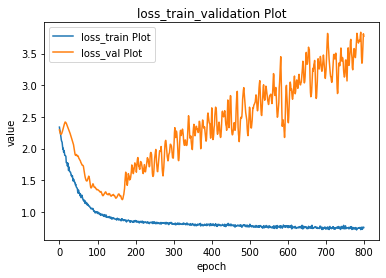

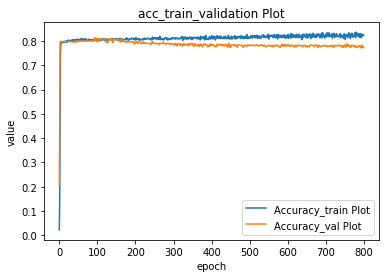

Optimization Finished!
Total time elapsed: 5.9417s


In [ ]:

from __future__ import division
from __future__ import print_function
import time
import argparse
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim


# Training settings

parser = argparse.ArgumentParser()
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='Disables CUDA training.')
parser.add_argument('--fastmode', action='store_true', default=False,
                    help='Validate during training pass.')
parser.add_argument('--seed', type=int, default=42, help='Random seed.')
parser.add_argument('--epochs', type=int, default=800,
                    help='Number of epochs to train.')
parser.add_argument('--lr', type=float, default=0.01,
                    help='Initial learning rate.')
parser.add_argument('--weight_decay', type=float, default=5e-4,
                    help='Weight decay (L2 loss on parameters).')
parser.add_argument('--hidden', type=int, default=16,
                    help='Number of hidden units.')
parser.add_argument('--dropout', type=float, default=0.5,
                    help='Dropout rate (1 - keep probability).')


#args = parser.parse_args()
#error midad khate bala,khate paein jaigozin shod

args = parser.parse_known_args()[0]

args.cuda = not args.no_cuda and torch.cuda.is_available()

np.random.seed(args.seed)
torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)


# Model and optimizer
model = GCN(nfeat=features.shape[1],
            nhid=args.hidden,
            nclass=class_names.size+1,
            #بدلیل صفر کردن لیبل هیدن ها تعداد کلاسها یکی بیشتر میشود
            dropout=args.dropout
            )

optimizer = optim.Adam(model.parameters(),
                       lr=args.lr, weight_decay=args.weight_decay)

# to set cuda as your device if possible
#training on  GPU

if args.cuda:
    model.cuda()
    features_test = features_test.cuda()
    adj_test = adj_test.cuda()
    labels_test = labels_test.cuda()
    features_train = features_train.cuda()
    adj_train = adj_train.cuda()
    labels_train = labels_train.cuda()
    features_val = features_val.cuda()
    adj_val = adj_val.cuda()
    labels_val = labels_val.cuda()
    # train:adjust the weights on the neural network
    # validation:used to minimize overfitting


def train(epoch):
  model.train()
  optimizer.zero_grad()
  output,predicted_output,act_dec = model(features_train,adj_train,hidden_labels_train,mode=0)

  #مقدار تصمیم گیری شده در اکتیولرنینگ یک اندیس از هیدن لیبل هاست که بیشترین تاثیر در بهبود خطاهای شبکه را دارد
  #(در واقع مقدارش را صفر میکنیم)لیبل آن را بدست آورده و به لیبل ها اضافه می کنیمو از هیدن ها هم آن را حذف میکنیم

  Uncover_label=labels_train_hidden[act_dec]
  labels_train[act_dec]=Uncover_label
  hidden_labels_train[act_dec]=0

  loss_train = F.nll_loss(output, labels_train)
  acc_train = accuracy(output,labels_train)
  # Computing the gradients necessary to adjust the weights
  loss_train.backward()
  # Updating the weights of the neural network
  optimizer.step()
  losses.append(loss_train.item())
  acc.append(acc_train.item())

  if not args.fastmode:
    # Evaluate validation set performance separately,
    # deactivates dropout during validation run.
    model.eval()
    output,predicted_output,act_dec_val = model(features_val, adj_val,hidden_labels_val,mode=-1)
    
  Uncover_label=labels_val_hidden[act_dec_val]
  labels_val[act_dec_val]=Uncover_label
  hidden_labels_val[act_dec_val]=0
  
  loss_val = F.nll_loss(output, labels_val)
  acc_val = accuracy(output, labels_val)
  losses_val.append(loss_val.item())
  acc_valid.append(acc_val.item())

  print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train.item()),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'acc_val: {:.4f}'.format(acc_val.item()),
          'time: {:.4f}s'.format(time.time() - t),
          act_dec,act_dec_val)

# Train model
t_total = time.time()
losses = []
acc=[]
losses_val = []
acc_valid=[]
t = time.time()
for epoch in range(args.epochs):
    train(epoch)


def test(): 
    model.eval()
  
    output,predicted_output,act_dec = model(features[idx_test]
                   ,adj[idx_test[0]:int(idx_test[-1])+1,idx_test[0]:int(idx_test[-1])+1],hidden_labels[idx_test],mode=-1)
    
    #Uncover_label=labels_test_hidden[act_dec]
    #labels_test[act_dec]=Uncover_label
    #hidden_labels_test[act_dec]=0

    loss_test = F.nll_loss(output, labels[idx_test])
    acc_test = accuracy(output, labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()),
          "accuracy= {:.4f}".format(acc_test.item()),
          "act_dec_test= {:.4f}".format(act_dec))
# Testing
test()

print(model)

#plotting loss_train_val:

plt.plot(np.array(losses),label ='loss_train Plot')
plt.plot(np.array(losses_val),label ='loss_val Plot')
plt.title('loss_train_validation Plot')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

#plotting acc_train_val:

plt.plot(np.array(acc),label ='Accuracy_train Plot')
plt.plot(np.array(acc_valid),label ='Accuracy_val Plot')
plt.title('acc_train_validation Plot')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()    

print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))


In [ ]:
#labels_test_hidden

In [ ]:
#labels_test_hidden[467]

In [ ]:
#labels_test

In [ ]:
#labels_test[467]

In [ ]:
#labels_train

In [ ]:
#labels_val

#Classify whole graph


In [ ]:
prediction,predicted_output,act_dec = model(features,adj,hidden_labels,-1)

acc_all=accuracy(prediction,labels)
print(
          "accuracy_Of_Classification= {:.4f}".format(acc_all.item())
        #  ,predicted_output
          )

accuracy_Of_Classification= 0.1469


In [ ]:
predicted_class=[]
for i in range(len(labels)):
  predicted_class.append(torch.argmax(predicted_output[i]))

In [ ]:
 predicted_class=torch.LongTensor(predicted_class)

In [ ]:
#prediction[20]

In [ ]:
import pandas as pd

df = pd.DataFrame({"Predicted": predicted_class, "True": labels})
df=df.loc [df['Predicted']==df['True']]
df
#df.head(1000)


,Predicted,True
20,10,10
22,3,3
29,3,3
37,3,3
48,3,3
...,...,...
13688,3,3
13703,3,3
13704,10,10
13743,3,3


In [ ]:
df.count()# True prediction out of 13752


Predicted    2020
True         2020
dtype: int64